In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit


# <span style="color:orange"> 17th March 2022</span>

# <span style="color:orange"> Numerical Simulation Laboratory: Simulation 2</span>

# <span style="color:green"> Exercise A: Random Walk</span>

The following plot depicts $\sqrt{<r^{2}>}$ for a random walk on a 3D lattice and a continuous tridimensional random walk, defined by a unitary step. $\sqrt{<r^{2}>}$ is obtained by generating $10^{4}$ random steps and then by calculating its value and its uncertainty through the data blocking technique. For this reason it is represented as a function of the number of blocks.
Since a diffusive trend is expected, for both cases, the datas are fitted with the funcion $k \sqrt{N}$, with N being the number of blocks.

optimized parameter for RW on lattice k =
[0.99563345]
parameter uncertainty =
[0.00038728]
optimized parameter for continuous RW k =
[1.]
parameter uncertainty =
[0.00050799]


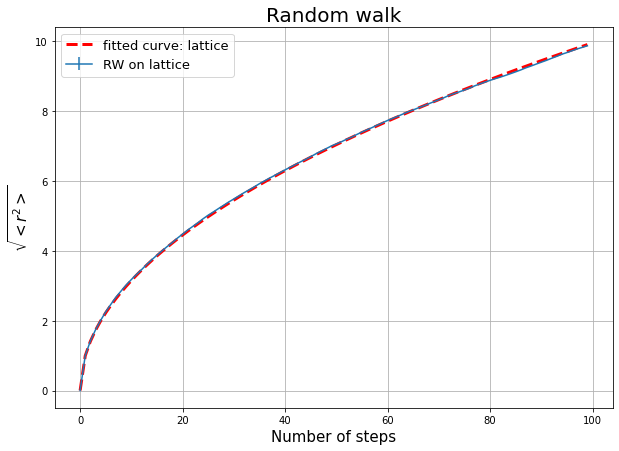

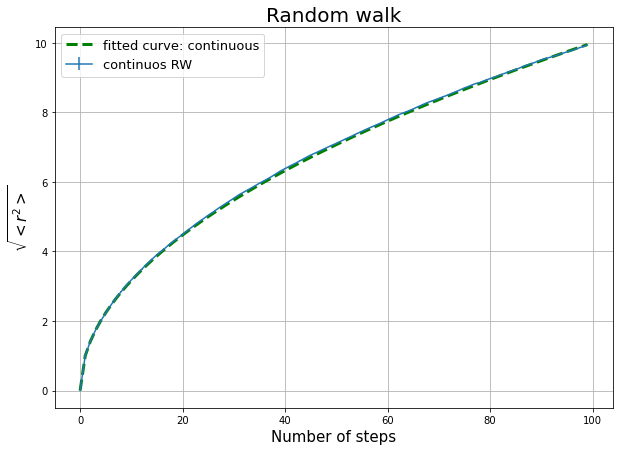

In [16]:

def f(x,k): # model for diffusive behaviour 
    return k*np.sqrt(x)

fig1, ax1 = plt.subplots(figsize=(10,7)) 
y = np.load('RadD.npy')
x = np.arange(100)
errs = np.load('ED.npy')
yc = np.load('RadC.npy')
errsc = np.load('EC.npy')
p_optD, p_covD = curve_fit(f, x, y, bounds=(0,1))
y_fitD = f(x,p_optD)
p_optC, p_covC = curve_fit(f, x, yc, bounds=(0,1))
y_fitC=f(x,p_optC)
ax1.errorbar(x,y,yerr=errs, label="RW on lattice")
ax1.set_title('Random walk',fontsize=20)
ax1.plot(x,y_fitD,'r--',linewidth=3, label="fitted curve: lattice") # plotting fitted function
ax1.set_xlabel('Number of steps', fontsize=15)
ax1.set_ylabel('$\sqrt{<r^{2}>}$', fontsize=15)
ax1.legend(loc="upper left", fontsize=13,frameon=True)
ax1.grid(True)

fig2, ax2 = plt.subplots(figsize=(10,7))
ax2.plot(x,y_fitC,'g--',linewidth=3, label="fitted curve: continuous") # plotting fitted function
ax2.errorbar(x,yc,yerr=errsc, label= "continuos RW")
ax2.set_title('Random walk',fontsize=20)
ax2.set_xlabel('Number of steps', fontsize=15)
ax2.set_ylabel('$\sqrt{<r^{2}>}$', fontsize=15)
ax2.legend(loc="upper left", fontsize=13,frameon=True)
ax2.grid(True)


print("optimized parameter for RW on lattice k =")
print(p_optD)
print("parameter uncertainty =")
print(np.sqrt(np.diagonal(p_covD)))
print("optimized parameter for continuous RW k =")
print(p_optC)
print("parameter uncertainty =")
print(np.sqrt(np.diagonal(p_covC)))


The plot and the result obtained for the parameter k show an agreement between the theory and the outcome of the numerical simulation. The typical behaviour for a diffusive phenomenon corresponds to a linear dependence between the time (or alternatively the number of steps) and the quadratic mean displacement, in particular for a random walk we should expect a value of $k = 1$.
### Important note:
Since the statistical uncertainties where extremely small, they are not visible on the graph. The fact that they are so small is reasonable, beacause of how precise the extimate of each point is 

# <span style="color:purple"> Exercise B: Montecarlo Integration</span>

The result of following integral $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ is calcutated using a Montecarlo Integration technique. While in the first case a uniform distribution in sampled in $[0,1]$, in the second importance samplig is applied, sampling points from a non uniform pdf. The first method is equivalent to compute the integral using the mean, in other words
$$I = lim_{N \rightarrow \infty}\frac{1}{N}\sum_{i=0}^{N}f(x_{i})\Delta x = (b-a)lim_{N \rightarrow \infty}\frac{1}{N}\sum_{i=0}^{N}f(x_{i})= (b-a)\langle f \rangle _{[a,b]}$$
where $x_{i}$ are sampled uniformly in $[0,1]$, which correspond to the integration interval.
The second method, on the other hand, is more refined, and allows  a better estimate of the integral. In particular the pdf selcted should have the following properties:

- is normalized in $[0,1]$
- in order to have the best estimate of $I$, the optimal choice for the pdf is the function that better resamble the integrand in $[0,1]$ 


How to choose such a function? Obviously if we could sample from a pdf that is the integrand itself we would have the exact value of the integral. On the other hand if this was the case, there would be no need of any type of integration technique because we could analitically sove the integral. A sensible approach could be approximating the integrand with its Taylor expansion in $[0,1]$. But in this case the expansion would give us a second grade polynomial, which is not suitable, because, in order to sample from a non uniform pdf, we have to compute the cumulative function and then its inverse. The inverse of a third grade polynomial uniquely exists in $[0,1]$ but it is not analytically computable.
So a pragmatic approach could be selecting a function that reasonably approximates the integrand in $[0,1]$ but on the other hand allows the application of the inversion of the cumulative, in order to sample the points for the pdf. I chose the function
$$f(x) = -2x+2$$
which is normalized in $[0,1]$.
Even if the approximation is quite rough the estimate of the integral is more precise than the one obatined by simply sampling uniformly in $[0,1]$, as depicted in the following plots.


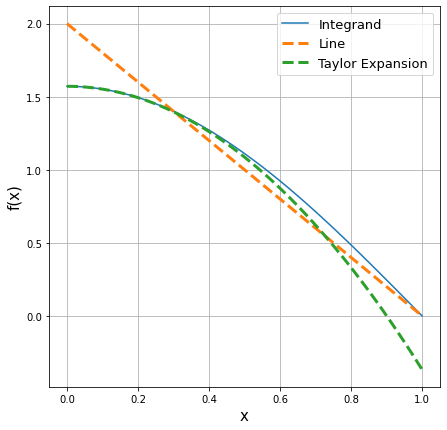

In [8]:
def line(x):
    return -2*x+2

def cosine(x):
    return 0.5*math.pi* np.cos(math.pi*0.5*x)

def poly(x):
    return 0.5*math.pi*(1-0.5*math.pi*math.pi*0.25*x**2)

z=np.linspace(0,1,101)
fig = plt.figure(figsize=(7,7)) 
plt.plot(z,cosine(z),label="Integrand")
plt.plot(z,line(z),'--',linewidth=3, label="Line")
plt.plot(z,poly(z),'--',linewidth=3,label="Taylor Expansion")
plt.legend(loc="upper right", fontsize=13,frameon=True)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.grid(True)
plt.show()

The following plot depicts the result of the integration obtained using the two methods

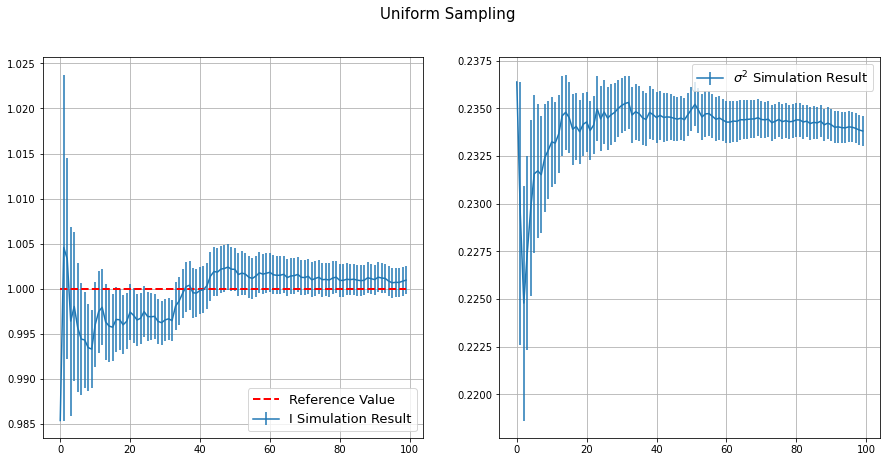

In [9]:

y1 = np.loadtxt('IntU.txt', delimiter=',', unpack=True)
x = np.arange(100)
err1 = np.loadtxt('ErrorU.txt', delimiter=',', unpack=True)
y2 = np.loadtxt('VarU.txt', delimiter=',', unpack=True)
err2 = np.loadtxt('ErrorVarU.txt', delimiter=',', unpack=True)
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Uniform Sampling',fontsize=15)
ax1.errorbar(x,y1,yerr=err1, label="I Simulation Result")
ax1.plot(x,np.ones(100), 'r--', linewidth=2, label="Reference Value")
ax2.errorbar(x,y2,yerr=err2, label= "$\sigma^{2}$ Simulation Result")
ax1.legend(loc="lower right", fontsize=13,frameon=True)
ax2.legend(loc="upper right", fontsize=13,frameon=True)
ax1.grid(True)
ax2.grid(True)


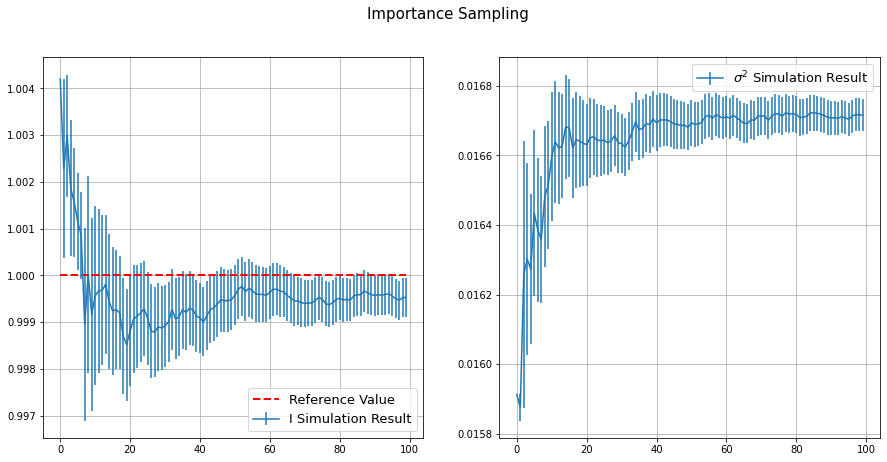

In [10]:
y1 = np.loadtxt('IntIS.txt', delimiter=',', unpack=True)
x = np.arange(100)
err1 = np.loadtxt('ErrorIS.txt', delimiter=',', unpack=True)
y2 = np.loadtxt('VarIS.txt', delimiter=',', unpack=True)
err2 = np.loadtxt('ErrorVarIS.txt', delimiter=',', unpack=True)
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Importance Sampling',fontsize=15)
ax1.errorbar(x,y1,yerr=err1, label="I Simulation Result")
ax1.plot(x,np.ones(100), 'r--', linewidth=2, label="Reference Value")
ax2.errorbar(x,y2,yerr=err2, label= "$\sigma^{2}$ Simulation Result")
ax1.legend(loc="lower right", fontsize=13,frameon=True)
ax2.legend(loc="upper right", fontsize=13,frameon=True)
ax1.grid(True)
ax2.grid(True)

Comparing the first and the second set of plots it is clear that importance sampling provides a better estimate of the integral, esplecially if we consider how much the variance decreases between the former and the latter case.